## Exerice 2 - Gauss-Seidel for Poisson Solver

## Task 2.1

NumPy arrays are used for the present exercise.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer


/home/felix/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
def gauss_seidel(f):
    newf = f.copy()

    for i in range(1,newf.shape[0]-1):
        for j in range(1,newf.shape[1]-1):
            newf[i,j] = 0.25 * (newf[i,j+1] + newf[i,j-1] +
                                   newf[i+1,j] + newf[i-1,j])

    return newf


In [4]:
size = [8,16,32,64,128,256,512]
duration = []

for s in size:
  x = np.random.rand(s,s)

  x[[-1,0],:] = 0 # boundary conditions
  x[:,[-1,0]] = 0

  t1 = timer()
  for i in range(1000): # number of iterations
      x = gauss_seidel(x)
  t2 = timer()
  print(f'{t2-t1} sec, grid size is: {s}')

  duration.append(t2-t1)


0.02239966400065896 sec, grid size is: 8
0.08080006399995909 sec, grid size is: 16
0.3329085119994488 sec, grid size is: 32
1.5217460470003061 sec, grid size is: 64
6.027611122999588 sec, grid size is: 128
26.18104578999919 sec, grid size is: 256
113.62896971700047 sec, grid size is: 512


Text(0.5, 1.0, 'Performance evaluation for varying grid sizes')

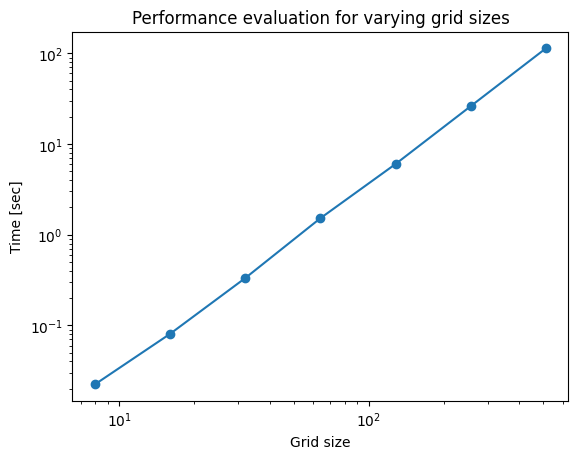

In [5]:
plt.plot(size, duration, linestyle="-", marker="o")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Grid size")
plt.ylabel("Time [sec]")
plt.title("Performance evaluation for varying grid sizes")


## Task 2.2

Line profiling is used in order to identify the part of the code that needs to be optimized.


In [24]:
%run -i -m kernprof -l 2d_poisson.py


Wrote profile results to 2d_poisson.py.lprof
Inspect results with:
python -m line_profiler -rmt "2d_poisson.py.lprof"


In [25]:
%run -i -m line_profiler 2d_poisson.py.lprof


Timer unit: 1e-06 s

Total time: 5.58383 s
File: 2d_poisson.py
Function: poisson_2d at line 5

Line #      Hits         Time  Per Hit   % Time  Line Contents
     5                                           @profile
     6                                           def poisson_2d():
     7         1          2.0      2.0      0.0      size = 64
     8         1        115.0    115.0      0.0      x = np.random.rand(size,size)
     9                                               
    10         1         50.0     50.0      0.0      x[[-1,0],:] = 0 # boundary conditions
    11         1         12.0     12.0      0.0      x[:,[-1,0]] = 0
    12                                           
    13      1001        204.0      0.2      0.0      for i in range(1000): # number of iterations
    14      1000    5583442.0   5583.4    100.0          x = gauss_seidel(x)

Total time: 3.45836 s
File: 2d_poisson.py
Function: gauss_seidel at line 16

Line #      Hits         Time  Per Hit   % Time  Line 

The most time-consuming part of the code is the function gauss_seidel and specifically the calculation of the new values of **newf** inside the double for-loop.


# Task 2.3

As it is seen in cythonfn_poisson.html all the lines of the function are yellow, which means that they call the Python virtual machine. Therefore, Cython is necessary in order to improve the performance of the code.


# Task 2.4

In [6]:
import cythonfn_poisson2


ModuleNotFoundError: No module named 'cythonfn_poisson2'

In [12]:
size = [8,16,32,64,128,256,512]
duration = []

for s in size:
  x = np.random.rand(s,s)

  x[[-1,0],:] = 0 # boundary conditions
  x[:,[-1,0]] = 0

  t1 = timer()
  for i in range(1000): # number of iterations
      x = cythonfn_poisson2.gauss_seidel(x,s)
  t2 = timer()
  print(f'{t2-t1} sec, grid size is: {s}')

  duration.append(t2-t1)


0.00452737498562783 sec, grid size is: 8
0.0049153750005643815 sec, grid size is: 16
0.008910832984838635 sec, grid size is: 32
0.024275083997054026 sec, grid size is: 64
0.11431729199830443 sec, grid size is: 128
0.4782045420142822 sec, grid size is: 256
2.0507552080089226 sec, grid size is: 512


Text(0.5, 1.0, 'Performance evaluation for varying grid sizes')

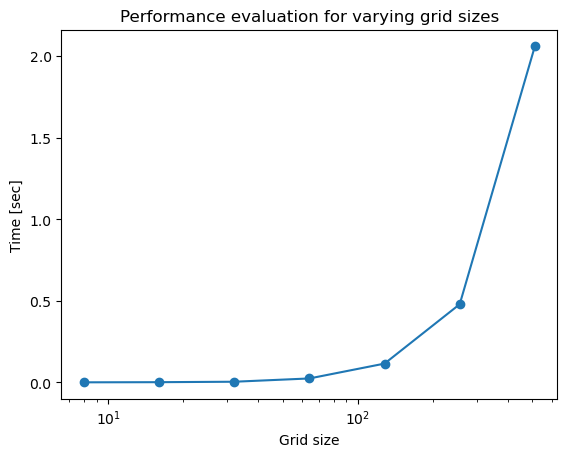

In [11]:
plt.plot(size, duration, linestyle="-", marker="o")
plt.xscale("log")
plt.xlabel("Grid size")
plt.ylabel("Time [sec]")
plt.title("Performance evaluation for varying grid sizes")


Comparing to Task 2.1, there is an impressive speed-up using Cython annotations. For example, the computational time is reduced from 101 to 2 sec for a grid of dimension 512x512.
